In [27]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Importar el dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
targets = iris.target_names
print(targets)
df.head()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
#Dividir el dataset
x = df.drop(["target"], axis=1)
y = df['target']
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)
#Crear conjunto de validación
xtest, xval, ytest, yval = train_test_split(xtest, ytest, test_size = 0.2, random_state = 42)

In [30]:
yval

143    2
56     1
128    2
69     1
68     1
82     1
Name: target, dtype: int32

In [31]:
ytest

45     0
131    2
36     0
73     1
76     1
104    2
31     0
9      0
12     0
26     0
18     0
118    2
145    2
78     1
127    2
108    2
55     1
30     0
29     0
141    2
110    2
19     0
132    2
64     1
Name: target, dtype: int32

In [32]:
len(ytest)

24

In [57]:
#Regresión logística
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# definir los parametros del modelo
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
#grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(xtrain, ytrain)
# Mostrar resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.963889 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.958333 (0.051595) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.955556 (0.055833) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.961111 (0.046812) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.961111 (0.046812) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.963889 (0.046564) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.961111 (0.046812) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.958333 (0.059900) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.958333 (0.059900) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.955556 (0.059835) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.944444 (0.065734) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.944444 (0.065734) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.855556 (0.077380) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.861111 (0.092128) with: {'

C:\Users\Antos\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
#Métricas
model1 = LogisticRegression(C= 10, penalty= "l2", solver= 'lbfgs')
lrm =model1.fit(xtrain, ytrain)
ypred = lrm.predict(xval)
accuracy = accuracy_score(yval, ypred.round())
r2 = r2_score(yval, ypred)
mse = mean_squared_error(yval, ypred)
rmse = np.sqrt(mse)
print("Accuracy: ", accuracy)
print("R2 score: ", r2)
print ("Mse: ", mse)
print("Rmse: ", rmse)
print("Coeficients and Interception: ",lrm.coef_, lrm.intercept_)

Accuracy:  1.0
R2 score:  1.0
Mse:  0.0
Rmse:  0.0
Coeficients and Interception:  [[-0.37993204  2.06173382 -4.0770181  -1.86887276]
 [ 0.94560501  0.14854084 -0.4086544  -2.00605747]
 [-0.56567296 -2.21027466  4.48567251  3.87493022]] [ 13.04360167   2.30270533 -15.34630701]


C:\Users\Antos\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
#Validación 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, xtest, ytest, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())


Scores: [-3.78592899e-02 -2.96282924e-02 -2.97085770e-02 -1.85923721e-02
 -6.62956897e-02 -1.99904701e-01 -2.76943257e-02 -1.04179804e-04
 -2.49122083e-02 -4.22976333e-03]
Mean: -0.04389293988377066
Standard deviation: 0.054805144825630925


In [35]:
# Predicciones
y_pred= lrm.predict(xtest)
ypred = np.round(y_pred)

print("Predicciones: ")

for i in range (len(ypred)):
    if ypred[i]==1.0:
        print("Iris-Versicolor \n")
    elif ypred[i] == 2.0:
        print("Iris-Virginica \n")
    else:
        print("Iris-Setosa \n")

Predicciones: 
Iris-Setosa 

Iris-Virginica 

Iris-Setosa 

Iris-Versicolor 

Iris-Versicolor 

Iris-Virginica 

Iris-Setosa 

Iris-Setosa 

Iris-Setosa 

Iris-Setosa 

Iris-Setosa 

Iris-Virginica 

Iris-Virginica 

Iris-Versicolor 

Iris-Virginica 

Iris-Virginica 

Iris-Versicolor 

Iris-Setosa 

Iris-Setosa 

Iris-Virginica 

Iris-Virginica 

Iris-Setosa 

Iris-Virginica 

Iris-Versicolor 



In [36]:
print("Valores del set de prueba: ")
for i in range (len(ytest)):
    if ytest.iloc[i]==1:
        print("Iris-Versicolor \n")
    elif ytest.iloc[i] == 2:
        print("Iris-Virginica \n")
    else:
        print("Iris-Setosa \n")

Valores del set de prueba: 
Iris-Setosa 

Iris-Virginica 

Iris-Setosa 

Iris-Versicolor 

Iris-Versicolor 

Iris-Virginica 

Iris-Setosa 

Iris-Setosa 

Iris-Setosa 

Iris-Setosa 

Iris-Setosa 

Iris-Virginica 

Iris-Virginica 

Iris-Versicolor 

Iris-Virginica 

Iris-Virginica 

Iris-Versicolor 

Iris-Setosa 

Iris-Setosa 

Iris-Virginica 

Iris-Virginica 

Iris-Setosa 

Iris-Virginica 

Iris-Versicolor 



In [85]:
#Para encontrar el bias del modelo
bias = np.mean(ypred)-np.mean(df["target"])
print("sesgo: ", bias)

sesgo:  0.33333333333333326


array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

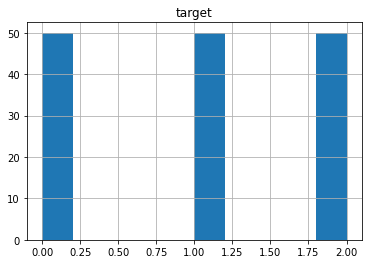

In [87]:
df.hist(column = "target")